In [0]:
#Qué pasa si tenemos variables no cuantitivas sino cualitativas, el caso máás común -> 0 o 1 | True o False
#-> Utilizamos entonces Regresión Lógistica que sirve para clasificar no para pronosticar


In [0]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt #Para visualizar datos en específico pyplot
import seaborn as sns #Trabajaremos los datos con esta biblioteca
%matplotlib inline 
#Es conocida como magic function -> Es para ajustar la gráfica

In [5]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#Outcome es el valor que tomaremos 
#Son bastante grandes y pueden buscarlos en linea -> Decirles que después les daréé de donde
diabetes.shape

(768, 9)

In [0]:

feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
#Son muchos atributos para aprender, sin embargo, pero el problema es de clasificación no de predicción
x= diabetes[feature_cols]
y= diabetes.Outcome

In [0]:
X_train,X_test, Y_train, Y_test = train_test_split(x,y,test_size =.25, random_state=0)

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)
#Ya tenemos asignados datos y entrenado los valores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
y_pred
#Impresióón de los datos

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [0]:
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

Text(33.0, 0.5, 'Etiqueta prediccion')

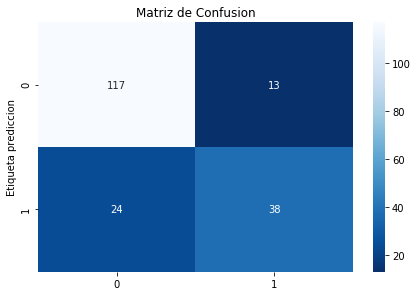

In [0]:
#Importar
import numpy as np

#Sin embargo, la matriz anterior vamos a interpretarla a detenimiento
class_names = [0,1] #Solo mostraremos 2 valores 0 = Sin diabetes 
fig, ax = plt.subplots() #Para graficar

tick_marks = np.arange(len(class_names)) #Mostrar en la grafica 
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#Mostraremos lo previo -> El dataframe es para pasar los datos al heatmap
#Cmap solo es la parte gráfica mediante color máás o menos instenso
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap= 'Blues_r', fmt = 'g')
ax.xaxis.set_label_position('top')

#Impresión
plt.tight_layout()
plt.title('Matriz de Confusion',y=1.1)
plt.ylabel('Etiqueta actual')
plt.ylabel('Etiqueta prediccion')



¿Y esto qué demonios significa xD ?

 
*   119 -> Fueron correctamente clasificados como Positivos a Diabetes

*   38 -> Fueron correctamente clasificados como Negativos a Diabetes
*   13 -> Fueron clasificados incorrectamente como Negativos a Diabetes

*   24 -> Fueron clasificados incorrectamente como Positivos a Diabetes










In [0]:
print("Exactitud: " ,metrics.accuracy_score(Y_test,y_pred)) #Que tan preciso es el modelo

Exactitud:  0.8072916666666666
